# Classification

$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

Classification tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $\x$. 

For instance, consider predicting gender from seeing a person's face, something we do fairly well as humans. To have a machine do this well, we would typically feed the machine a bunch of images of people which have been labelled "male" or "female" (the training set), and have it learn the gender of the person in the image. Then, given a new photo, the algorithm learned returns us the gender of the person in the photo.

There are different ways of making classifications. One idea is shown schematically in the image below, where we find a line (decision boundary) that divides "things" of two different types in a 2-dimensional feature space.

![Splitting using a single line](img/onelinesplit.png)

### Logistic Regression: The Math

We could approach classification as linear regression, there the class, 0 or 1, is the target variable $y$. But this ignores the fact that our output $y$ is discrete valued, and futhermore, the $y$ predicted by linear regression will in general take on values less than 0 and greater than 1. Thus this does not seem like a very good idea.

But what if we could change the form of our hypotheses $h(x)$ instead?

The idea behind logistic regression is very simple. We want to draw a line in feature space that divides the '1' samples from the '0' samples, just like in the diagram above. In other words, we wish to find the "regression" line which divides the samples. Now, a line has the form $w_1 x_1 + w_2 x_2 + w_0 = 0$ in 2-dimensions. On one side of this line we have 

$$w_1 x_1 + w_2 x_2 + w_0 \ge 0,$$

and on the other side we have 

$$w_1 x_1 + w_2 x_2 + w_0 < 0.$$ 

Our classification rule then becomes:

\begin{eqnarray*}
y = 1   & if& \v{w}\cdot\v{x} \ge 0\\
y = 0   & if& \v{w}\cdot\v{x} < 0
\end{eqnarray*}

where $\v{x}$ is the vector $\{1,x_1, x_2,...,x_n\}$ where we have also generalized to more than 2 features.

What hypotheses $h$ can we use to achieve this? One way to do so is to use the **sigmoid** function:

$$h(z) = \frac{1}{1 + e^{-z}}.$$

Notice that at $z=0$ this function has the value 0.5. 

If $z < 0$; then $h < 0.5$ and as $z \to -\infty$ then $h \to 0$.

If $z > 0$; then $h > 0.5$ and as $z \to \infty$ then $h \to 1$. 

 As long as we identify any value of $y > 0.5$ as 1, and any $y < 0.5$ as 0, we can achieve what we wished above.

This function is plotted below:

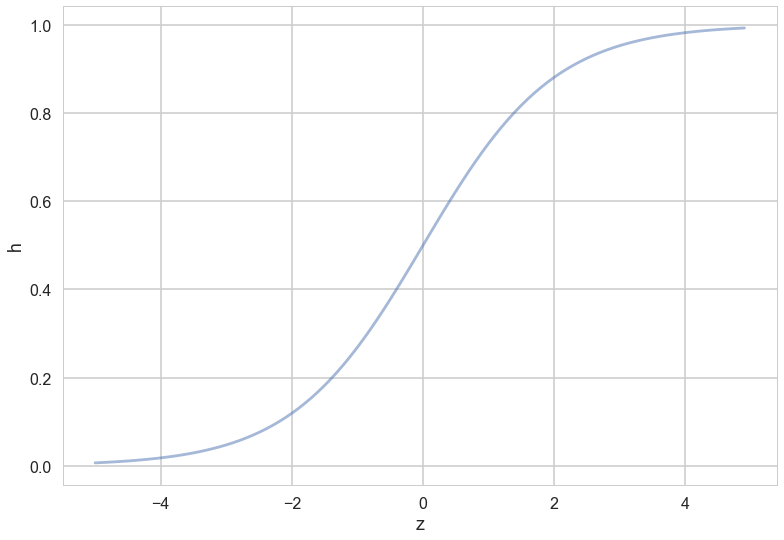

In [107]:
# Plot showing 'logistic regression'
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);
plt.xlabel("z")
plt.ylabel("h")

So we then come up with our rule by identifying:

$$z = \v{w}\cdot\v{x}.$$

Then $h(\v{w}\cdot\v{x}) \ge 0.5$ if $\v{w}\cdot\v{x} \ge 0$ and $h(\v{w}\cdot\v{x}) \lt 0.5$ if $\v{w}\cdot\v{x} \lt 0$, and:

\begin{eqnarray*}
y = 1 &if& h(\v{w}\cdot\v{x}) \ge 0.5\\
y = 0 &if& h(\v{w}\cdot\v{x}) \lt 0.5.
\end{eqnarray*}

We will show soon that this identification can be achieved by minimizing a loss in the ERM framework called the **log loss** :

$$ R_{\cal{D}}(\v{w}) = - \sum_{y_i \in \cal{D}} \left ( y_i log(h(\v{w}\cdot\v{x})) + ( 1 - y_i) log(1 - h(\v{w}\cdot\v{x})) \right )$$

More generally we add a regularization term (as in the ridge regression):

$$ R_{\cal{D}}(\v{w}) = - \sum_{y_i \in \cal{D}} \left ( y_i log(h(\v{w}\cdot\v{x})) + ( 1 - y_i) log(1 - h(\v{w}\cdot\v{x})) \right ) + \frac{1}{C} \v{w}\cdot\v{w},$$

where $C$ is the regularization strength (corresponding to $1/\alpha$ from the Ridge case), and smaller values of $C$ mean stronger regularization. 

**Note:** Regularization tries to prevent features from having terribly high weights, thus implementing a form of feature selection. 

In [1]:
# Importing required libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [113]:
# Formatting plots and styles
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

# Formatting colormaps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

## Using `sklearn`: The heights and weights example

We'll use a dataset of heights and weights of males and females to hone our understanding of classifiers. We load the data into a dataframe and plot it.

In [114]:
df = pd.read_csv("data/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Remember that the form of data we will use always is

![dataform](img/dataform.jpg)

with the "response" as a plain array

`[1,1,0,0,0,1,0,1,0....]`.

**Your turn:** 

* Create a scatter plot of Weight vs. Height
* Color the points differently by Gender

### Scatter plot between height and weight for diferent genders

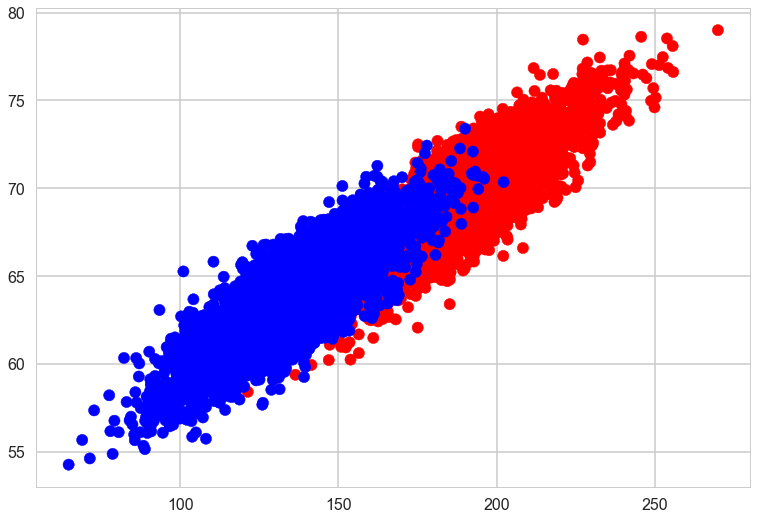

In [133]:
plt.scatter(df['Weight'], df['Height'], c = ['Red' if gender == 'Male' else 'Blue' for gender in df['Gender']])

### Basic Logistic Regression vs Logistic Regression with Cross Validation

In [118]:
# Performing necessary imports
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Height','Weight']].values, 
                                                    (df.Gender == "Male").values, random_state = 5)

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [119]:
# Simple logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

# Simple logistic regression
reg = LogisticRegression()
reg.fit(X_train, y_train)
print(accuracy_score(reg.predict(X_test),y_test))

0.9252


In [120]:
# Logistic Regression using cross-validation
def cv_score(logreg, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        logreg.fit(x[train], y[train])          # fit
        result += score_func(logreg.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold                    # average

In [121]:
# Performing Logistic Regression
logreg = LogisticRegression()
score = cv_score(logreg, X_train, y_train)
print(score)

0.917066666667


While this looks like a pretty great model, we would like to ensure two things:

* We have found the best model (in terms of model parameters).
* The model is highly likely to generalize i.e. perform well on unseen data.

For tuning your model, you will use a mix of *cross-validation* and *grid search*. In Logistic Regression, the most important parameter to tune is the *regularization parameter* `C`. You will now implement some code to perform model tuning. 

### Hyperparameter Tuning - Choosing Regularization Parameter (C)

#### (a) Using Accuracy Score

In [122]:
# Choosing optimal regularization parameter
Cs = [0.001, 0.1, 1, 10, 100]
results = []
max_score = 0
for c in Cs:
    reg = LogisticRegression(C=c)
    reg.fit(X_train, y_train)
    score = accuracy_score(reg.predict(X_train),y_train)
    print("%f score: %f" % (c, score))
    if (score > max_score):
        max_score = score
        best_c = c

print("Best c:" + str(best_c))

0.001000 score: 0.916933
0.100000 score: 0.916800
1.000000 score: 0.916800
10.000000 score: 0.916800
100.000000 score: 0.916800
Best c:0.001


* Now I use the C obtained from the procedure earlier and train a Logistic Regression on the training data
* Calculate the accuracy on the test data

In [123]:
# Fitting model with 'best c'
reg = LogisticRegression(C = best_c)
reg.fit(X_train, y_train)
accuracy = accuracy_score(reg.predict(X_test), y_test)
print(accuracy)

0.9256


**Things to think about**

You may notice that this particular value of `C` may or may not do as well as simply running the default model on a random train-test split. 

* Do you think that's a problem? 
* Why do we need to do this whole cross-validation and grid search stuff anyway?

**Note:** The model peforms differently on different samples. Hence we have to find the optimal value of C. To do that, we need to run multiple tests. 

Cross-validation is another way of running multiple tests, to make sure our model is robust for new data sets. In other words, we're searching the possible combinations of our parameter, lambda (C) and the coefficients in our model for the optimal combination which minimizes the total errors.

#### (b) Use scikit-learn's GridSearchCV tool

**Your turn (extra credit):** Use scikit-learn's [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) tool to perform cross validation and grid search. 

* Instead of writing your own loops above to iterate over the model parameters, can you use GridSearchCV to find the best model over the training set? 
* Does it give you the same best value of `C`?
* How does this model you've obtained perform on the test set?

In [125]:
# Necessary Imports
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Choosing best parameters using GridSearchCV
param_grid = {'C': [0.001, 0.1, 1, 10, 100]}
reg = GridSearchCV(LogisticRegression(C=1), param_grid = param_grid)
reg.fit(X_train, y_train)
print("Best Params:")
print(reg.best_params_)

Best Params:
{'C': 1}


In [126]:
# Grid Scores
print("Grid scores:")
for params, mean_score, scores in reg.grid_scores_:
    print("%0.3f for %r"
          % (mean_score, params))

Grid scores:
0.916 for {'C': 0.001}
0.917 for {'C': 0.1}
0.917 for {'C': 1}
0.917 for {'C': 10}
0.917 for {'C': 100}


In [127]:
# Accuracy Score
accuracy = accuracy_score(reg.predict(X_test), y_test)
print("Accuracy: %f" % accuracy)

Accuracy: 0.925200


In [128]:
# Classification Report
print("Classification report:")
y_true, y_pred = y_test, reg.predict(X_test)
print(classification_report(y_true, y_pred))

Classification report:
             precision    recall  f1-score   support

      False       0.92      0.93      0.92      1232
       True       0.93      0.92      0.93      1268

avg / total       0.93      0.93      0.93      2500



In [129]:
# Best Estimator from Grid Search
print("Best Estimator: ")
print(clf.best_estimator_)

Best Estimator: 
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


**My Comment**: The results are different. In earlier approach (looping and using acccuracy score) the best value of C = 0.1 while using the grid search returned C = 1 as the an optimal value for the regularization parameter. However, the accuracy of the model changes very little.

## Modified Logistic Regression

### Setting up some code

Function `cv_optimize` takes <br>
    a classifier `clf`, <br>
    a grid of hyperparameters (regularization parameter) which is implemented as a dictionary `parameters`, <br>
    a training set (as an array) `Xtrain`, <br>
    and a set of labels `ytrain`. <br>
    
The code takes the traning set, splits it into `n_folds` parts, and carries out a cross-validation by splitting the training set into a training and validation section for each fold. It prints the best value of the parameters, and returns the best classifier.

In [81]:
# Returning best estimator
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds = 5):
    gs = GridSearchCV(clf, param_grid = parameters, cv = n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

We then use this best classifier to fit the entire training set. 

This is done inside the `do_classify` function which takes <br> 
a classifier `clf`, <br> 
hyperparameters `parameters`,<br> 
a dataframe `indf`,<br> 
the columns in the list `featurenames` as the features, <br> 
the column `targetname` sets the target. <br> 

The classification is done by setting those samples for which `targetname` has value `target1val` to the value 1, and all others to 0. We split the dataframe into 80% training and 20% testing by default, standardizing the dataset if desired. (Standardizing a data set involves scaling the data so that it has 0 mean and is described in units of its standard deviation. 

We then train the model on the training set using cross-validation. Having obtained the best classifier using `cv_optimize`, we re-train on the entire training set and calculate the training and testing accuracy, which we print. We return the split data and the trained classifier.

In [130]:
# Function to perfor cross validation and return best classifier, train and test data
def do_classify(reg, parameters, data, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    
    # Selecting columns of interest (features)
    sub_data = data[featurenames]
    
    # Standardizing the data based on the requirement
    if standardize:
        sub_data_std = (sub_data - sub_data.mean())/sub_data.std()
    else:
        sub_data_std = sub_data
    
    # Extracting values for 'X' and 'y'
    X =  sub_data_std.values
    y = (data[targetname].values == target1val)*1
    
    # Splitting the data using train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = train_size)
    
    # Computing the optimal parameters and fitting them to the model
    reg = cv_optimize(reg, parameters, Xtrain, ytrain)
    reg_fit = reg.fit(Xtrain, ytrain)
    training_accuracy = reg_fit.score(Xtrain, ytrain)
    test_accuracy = reg_fit.score(Xtest, ytest)
    
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    return reg, Xtrain, ytrain, Xtest, ytest

In [138]:
# Function to plot points
def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [139]:
# Function to plot points proba
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

### Modified Logistic Regression: Implementation and Interpretation

In [84]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [134]:
# def do_classify(reg, parameters, data, featurenames, targetname, target1val, standardize=False, train_size=0.8)
reg, Xtrain, ytrain, Xtest, ytest  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df, ['Weight', 'Height'], 'Gender', 'Male')

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.91


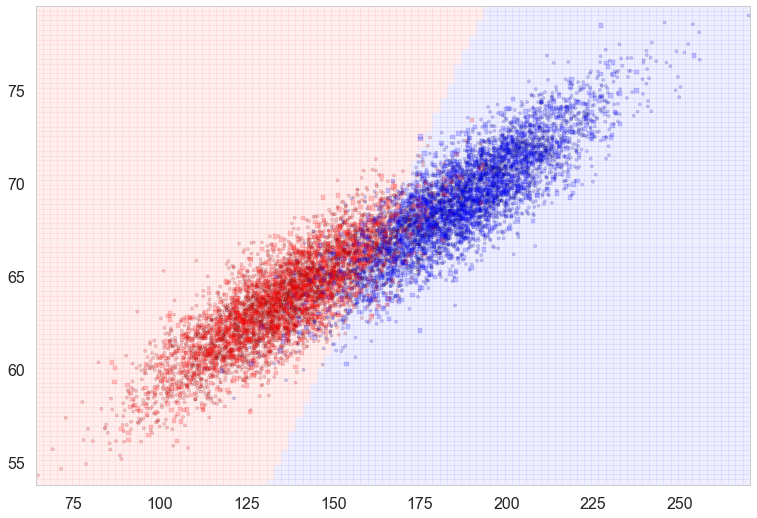

In [135]:
# Plotting the points
plt.figure()
ax = plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, reg, alpha=0.2);

In the figure here showing the results of the logistic regression, we plot the actual labels of both the training(circles) and test(squares) samples. 

The 0's (females) are plotted in red, the 1's (males) in blue. We also show the classification boundary, a line (to the resolution of a grid square). 

Every sample on the red background side of the line will be classified female, and every sample on the blue side, male. Notice that most of the samples are classified well, but there are misclassified people on both sides, as evidenced by leakage of dots or squares of one color ontothe side of the other color. Both test and traing accuracy are about 92%.

### The probabilistic interpretaion

Remember we said earlier that if $h > 0.5$ we ought to identify the sample with $y=1$? One way of thinking about this is to identify $h(\v{w}\cdot\v{x})$ with the probability that the sample is a '1' ($y=1$). Then we have the intuitive notion that lets identify a sample as 1 if we find that the probabilty of being a '1' is $\ge 0.5$.

So suppose we say then that the probability of $y=1$ for a given $\v{x}$ is given by $h(\v{w}\cdot\v{x})$?

Then, the conditional probabilities of $y=1$ or $y=0$ given a particular sample's features $\v{x}$ are:

\begin{eqnarray*}
P(y=1 | \v{x}) &=& h(\v{w}\cdot\v{x}) \\
P(y=0 | \v{x}) &=& 1 - h(\v{w}\cdot\v{x}).
\end{eqnarray*}

These two can be written together as

$$P(y|\v{x}, \v{w}) = h(\v{w}\cdot\v{x})^y \left(1 - h(\v{w}\cdot\v{x}) \right)^{(1-y)} $$

Then multiplying over the samples we get the probability of the training $y$ given $\v{w}$ and the $\v{x}$:

$$P(y|\v{x},\v{w}) = P(\{y_i\} | \{\v{x}_i\}, \v{w}) = \prod_{y_i \in \cal{D}} P(y_i|\v{x_i}, \v{w}) = \prod_{y_i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}$$

Why use probabilities? Earlier, we talked about how the regression function $f(x)$ never gives us the $y$ exactly, because of noise. This hold for classification too. Even with identical features, a different sample may be classified differently. 

We said that another way to think about a noisy $y$ is to imagine that our data $\dat$ was generated from  a joint probability distribution $P(x,y)$. Thus we need to model $y$ at a given $x$, written as $P(y|x)$, and since $P(x)$ is also a probability distribution, we have:

$$P(x,y) = P(y | x) P(x) ,$$

and can obtain our joint probability ($P(x, y))$.

Indeed its important to realize that a particular training set can be thought of as a draw from some "true" probability distribution (just as we did when showing the hairy variance diagram). If for example the probability of classifying a test sample as a '0' was 0.1, and it turns out that the test sample was a '0', it does not mean that this model was necessarily wrong. After all, in roughly a 10th of the draws, this new sample would be classified as a '0'! But, of-course its more unlikely than its likely, and having good probabilities means that we'll be likely right most of the time, which is what we want to achieve in classification. And furthermore, we can quantify this accuracy.

Thus its desirable to have probabilistic, or at the very least, ranked models of classification where you can tell which sample is more likely to be classified as a '1'. There are business reasons for this too. Consider the example of customer "churn": you are a cell-phone company and want to know, based on some of my purchasing habit and characteristic "features" if I am a likely defector. If so, you'll offer me an incentive not to defect. In this scenario, you might want to know which customers are most likely to defect, or even more precisely, which are most likely to respond to incentives. Based on these probabilities, you could then spend a finite marketing budget wisely.

### Maximizing the probability of the training set.

Now if we maximize $$P(y|\v{x},\v{w})$$, we will maximize the chance that each point is classified correctly, which is what we want to do. While this is not exactly the same thing as maximizing the 1-0 training risk, it is a principled way of obtaining the highest probability classification. This process is called **maximum likelihood** estimation since we are maximising the **likelihood of the training data y**, 

$$\like = P(y|\v{x},\v{w}).$$ 

Maximum likelihood is one of the corenerstone methods in statistics, and is used to estimate probabilities of data. 

We can equivalently maximize 

$$\loglike = log(P(y|\v{x},\v{w}))$$ 

since the natural logarithm $log$ is a monotonic function. This is known as maximizing the **log-likelihood**. Thus we can equivalently *minimize* a risk that is the negative of  $log(P(y|\v{x},\v{w}))$:

$$R_{\cal{D}}(h(x)) = -\loglike = -log \like = - log(P(y|\v{x},\v{w})).$$


Thus

\begin{eqnarray*}
R_{\cal{D}}(h(x)) &=& -log\left(\prod_{y_i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\
                  &=& -\sum_{y_i \in \cal{D}} log\left(h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\                  
                  &=& -\sum_{y_i \in \cal{D}} log\,h(\v{w}\cdot\v{x_i})^{y_i} + log\,\left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\\
                  &=& - \sum_{y_i \in \cal{D}} \left ( y_i log(h(\v{w}\cdot\v{x})) + ( 1 - y_i) log(1 - h(\v{w}\cdot\v{x})) \right )
\end{eqnarray*}
                  
This is exactly the risk we had above, leaving out the regularization term (which we shall return to later) and was the reason we chose it over the 1-0 risk. 

Notice that this little process we carried out above tells us something very interesting: **Probabilistic estimation using maximum likelihood is equivalent to Empiricial Risk Minimization using the negative log-likelihood**, since all we did was to minimize the negative log-likelihood over the training samples.

`sklearn` will return the probabilities for our samples, or for that matter, for any input vector set $\{\v{x}_i\}$, i.e. $P(y_i | \v{x}_i, \v{w})$:

In [136]:
reg.predict_proba(Xtest)

array([[  9.96955295e-01,   3.04470505e-03],
       [  8.02635490e-04,   9.99197365e-01],
       [  9.86961263e-01,   1.30387368e-02],
       ..., 
       [  6.90660782e-02,   9.30933922e-01],
       [  4.37830999e-02,   9.56216900e-01],
       [  9.92130655e-01,   7.86934475e-03]])

In [57]:
clf_l.predict_proba(Xtest_l)

array([[  9.99992457e-01,   7.54289389e-06],
       [  9.92664963e-01,   7.33503720e-03],
       [  1.11616374e-03,   9.98883836e-01],
       ..., 
       [  1.73783678e-01,   8.26216322e-01],
       [  8.77407940e-01,   1.22592060e-01],
       [  9.90273061e-01,   9.72693898e-03]])

### Discriminative classifier

Logistic regression is what is known as a **discriminative classifier**. Let us plot the probabilities obtained from `predict_proba`, overlayed on the samples with their true labels:

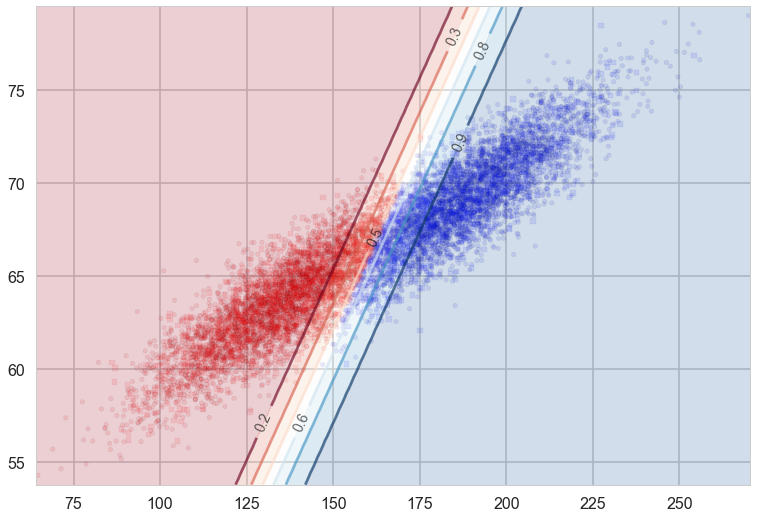

In [137]:
# Plotting points
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, reg, psize=20, alpha=0.1);

Notice that lines of equal probability, as might be expected are stright lines. What the classifier does is very intuitive: if the probability is greater than 0.5, it classifies the sample as type '1' (male), otherwise it classifies the sample to be class '0'. Thus in the diagram above, where we have plotted predicted values rather than actual labels of samples, there is a clear demarcation at the 0.5 probability line.

This notion of trying to obtain the line or boundary of demarcation is what is called a **discriminative** classifier. The algorithm tries to find a decision boundary that separates the males from the females. To classify a new sample as male or female, it checks on which side of the decision boundary the sample falls, and makes a prediction. In other words we are asking, given $\v{x}$, what is the probability of a given $y$, or, what is the likelihood $P(y|\v{x},\v{w})$?